# Country wise average and malnutrition dataset

Income - income class of people

severe wasting - the skinny situation faced by people

wasting - unable to move parts

Stunting - chronic undernutriton

LIFD - Low income food deficient

LDC - Low Developed Countries

LLDC - Land Locked Developing Countries 

SIDS - Small Island Developing States 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
datae = pd.read_csv('country-wise-average.csv')
datae.head()
data_est = pd.read_csv('malnutrition-estimates.csv')
data_est.head()


,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225


So now we get into the basic EDA without using any external libraries

# EDA

Separating categories and numerical variables in the dataset

In [27]:
categori = [var for var in datae.columns if datae[var].dtype == 'O']
print('the no of categoricals ',len(categori))

numerical = [var for var in datae.columns if datae[var].dtype != 'O']
print('the no of numericals', len(numerical))

the no of categoricals  1
the no of numericals 7


In [28]:
datae.describe()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,152.000000,140.000000,150.000000,149.000000,151.000000,150.000000,152.000000
mean,1.427632,2.168650,6.599257,7.201638,25.814728,13.503047,4042.927052
std,0.967019,1.708939,4.481723,4.649144,14.686807,10.895839,13164.191927
min,0.000000,0.000000,0.000000,0.962500,1.000000,0.100000,1.000000
25%,1.000000,0.900000,3.262500,3.850000,13.485000,4.305000,241.765813
50%,1.000000,1.872500,5.710714,6.300000,24.160000,10.380000,981.233486
75%,2.000000,2.822727,8.740476,9.080000,36.564935,19.496875,3002.433080
max,3.000000,11.400000,23.650000,26.500000,57.600000,46.266667,123014.491000


In [29]:
for col in datae.columns:
    print(col, datae[col].unique(), datae[col].dtype)

Country ['AFGHANISTAN' 'ALBANIA' 'ALGERIA' 'ANGOLA' 'ARGENTINA' 'ARMENIA'
 'AUSTRALIA' 'AZERBAIJAN' 'BAHRAIN' 'BANGLADESH' 'BARBADOS' 'BELARUS'
 'BELIZE' 'BENIN' 'BHUTAN' 'BOLIVIA (PLURINATIONAL STATE OF)'
 'BOSNIA AND HERZEGOVINA' 'BOTSWANA' 'BRAZIL' 'BRUNEI DARUSSALAM'
 'BULGARIA' 'BURKINA FASO' 'BURUNDI' 'CABO VERDE' 'CAMBODIA' 'CAMEROON'
 'CANADA' 'CENTRAL AFRICAN REPUBLIC (THE)' 'CHAD' 'CHILE' 'CHINA'
 'COLOMBIA' 'COMOROS (THE)' 'CONGO (THE)' 'COSTA RICA' "COTE D'IVOIRE"
 'CUBA' 'CZECHIA' "DEMOCRATIC PEOPLE'S REP. OF KOREA (THE)"
 'DEMOCRATIC REP. OF THE CONGO (THE)' 'DJIBOUTI'
 'DOMINICAN REPUBLIC (THE)' 'ECUADOR' 'EGYPT' 'EL SALVADOR'
 'EQUATORIAL GUINEA' 'ERITREA' 'ESWATINI' 'ETHIOPIA' 'FIJI' 'GABON'
 'GAMBIA (THE)' 'GEORGIA' 'GERMANY' 'GHANA' 'GUATEMALA' 'GUINEA'
 'GUINEA-BISSAU' 'GUYANA' 'HAITI' 'HONDURAS' 'INDIA' 'INDONESIA'
 'IRAN (ISLAMIC REPUBLIC OF)' 'IRAQ' 'JAMAICA' 'JAPAN' 'JORDAN'
 'KAZAKHSTAN' 'KENYA' 'KIRIBATI' 'KUWAIT' 'KYRGYZSTAN'
 "LAO PEOPLE'S DEMOCRATIC REP. (T

### Finding missing vals

In [30]:
datae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                152 non-null    object 
 1   Income Classification  152 non-null    float64
 2   Severe Wasting         140 non-null    float64
 3   Wasting                150 non-null    float64
 4   Overweight             149 non-null    float64
 5   Stunting               151 non-null    float64
 6   Underweight            150 non-null    float64
 7   U5 Population ('000s)  152 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


In [31]:
datae.isnull().mean()

Country                  0.000000
Income Classification    0.000000
Severe Wasting           0.078947
Wasting                  0.013158
Overweight               0.019737
Stunting                 0.006579
Underweight              0.013158
U5 Population ('000s)    0.000000
dtype: float64

In [32]:
datae['Severe Wasting']= datae['Severe Wasting'].fillna(0.0)
datae['Wasting'] = datae['Wasting'].fillna(0.0)
datae['Overweight'] = datae['Overweight'].fillna(0.0)
datae['Stunting'] = datae['Stunting'].fillna(0.0)
datae['Underweight'] = datae['Underweight'].fillna(0.0)

We got missing valuses in underweight, stunting, overweight, wasting, severe wasting

### Finding outliers

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Income Classification'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Severe Wasting'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Wasting'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Overweight'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Stunting'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Underweight'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel="U5 Population ('000s)">

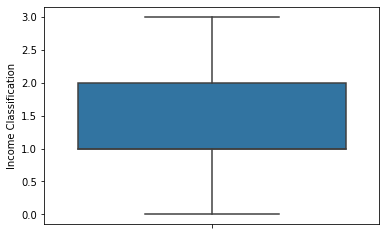

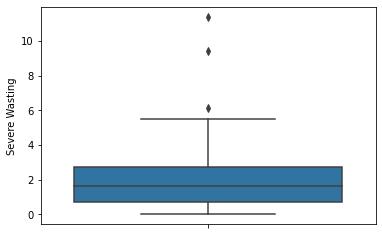

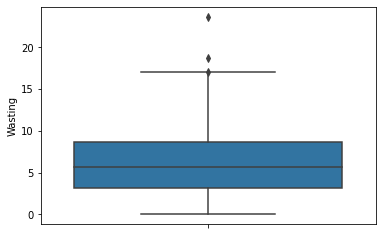

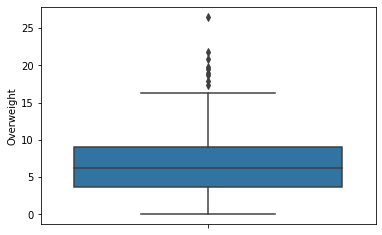

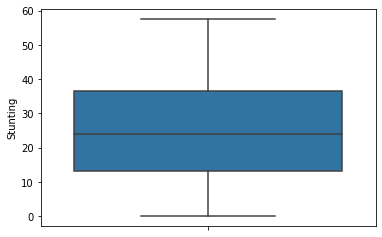

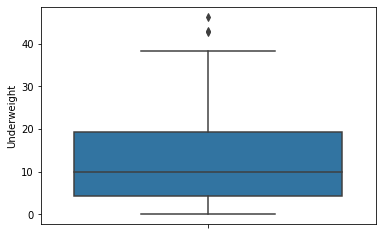

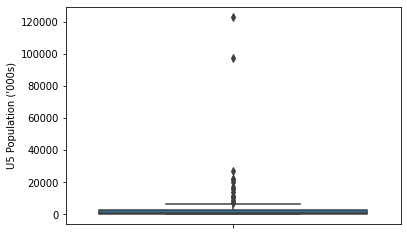

In [33]:
df1 = datae.select_dtypes([np.int64, np.float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.boxplot(y=col, data=df1)

We got outliers except stunting and income classification

# Analysis of countries which are both LDC and LIFD

Calculating for recent survey 2018 with LDC and LIFD

<AxesSubplot:xlabel='Wasting', ylabel='Country'>

<AxesSubplot:xlabel='Severe Wasting', ylabel='Country'>

<AxesSubplot:xlabel='Stunting', ylabel='Country'>

<AxesSubplot:xlabel='Underweight', ylabel='Country'>

<AxesSubplot:xlabel='Overweight', ylabel='Country'>

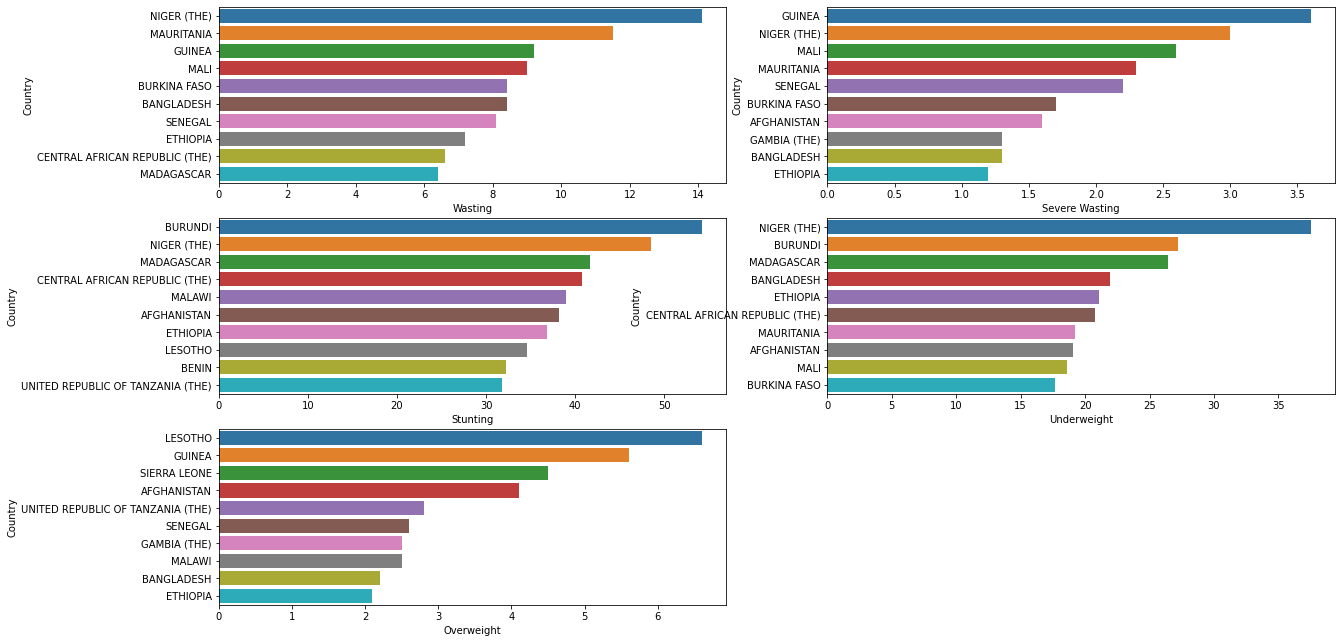

In [36]:
data_est = data_est.loc[data_est.Year >=2018]
temp = data_est.loc[(data_est.LDC == 1) & (data_est.LIFD ==1)]

# 10 contries in which Stunting percentage is highest
stunting_df = temp.sort_values(by='Stunting', ascending =False).head(10)
underweight_df =temp.sort_values(by='Underweight', ascending =False).head(10)
overweight_df=temp.sort_values(by='Overweight', ascending =False).head(10)
severe_wasting_df=temp.sort_values(by='Severe Wasting', ascending =False).head(10)
wasting_df =temp.sort_values(by='Wasting', ascending =False).head(10)

fig =plt.figure(figsize = (20,11))
ax1 = fig.add_subplot(3,2,1)
ax2 =fig.add_subplot(3,2,2)
ax3 =fig.add_subplot(3,2,3)
ax4 =fig.add_subplot(3,2,4)
ax5 =fig.add_subplot(3,2,5)

sns.barplot(data =wasting_df,ax=ax1, y='Country', x='Wasting', orient='h')
sns.barplot(data =severe_wasting_df,ax=ax2, y='Country', x='Severe Wasting', orient='h')
sns.barplot(data =stunting_df,ax=ax3, y='Country', x='Stunting', orient='h')
sns.barplot(data =underweight_df,ax=ax4, y='Country', x='Underweight', orient='h')
sns.barplot(data =overweight_df,ax=ax5, y='Country', x='Overweight', orient='h')
plt.show()


## Conclusion from this graph

1)Most African nations like Niger, Ethiopia, Senegal, CAF, Madasgar is affected by malnutrition

2) Highest undernutrition:

Stunting > Wasting > Severe Wasting > Underweight > Overweight 

<AxesSubplot:xlabel='Underweight'>

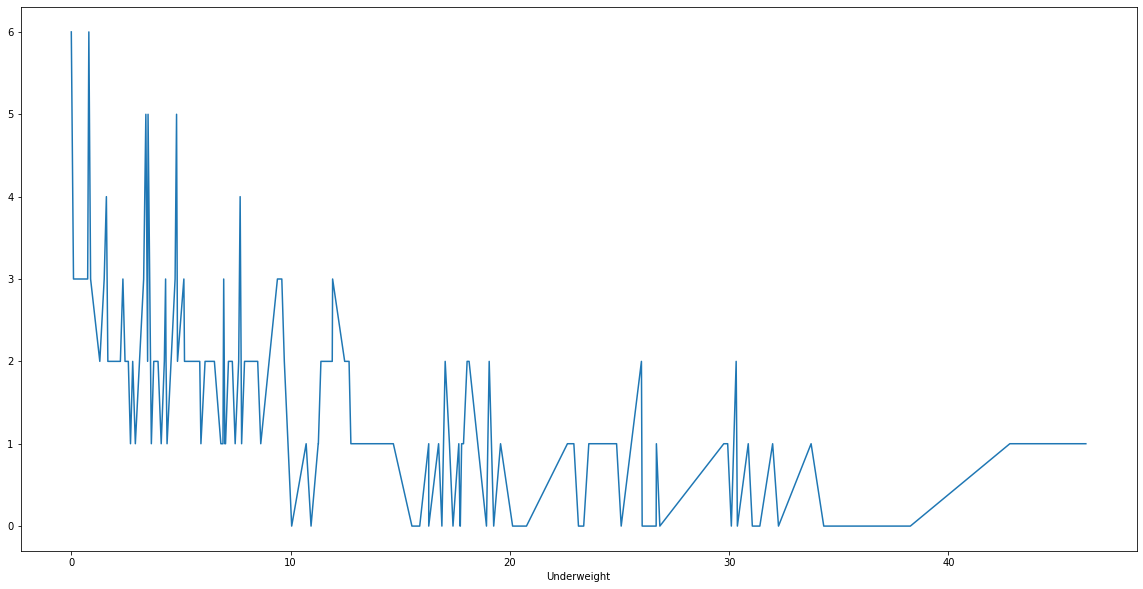

In [38]:
datae.groupby(['Underweight'])['Income Classification'].sum().plot(figsize = (20,10))

From this we can say that weight of underwi=eight persons is inversly propotional to the income

<AxesSubplot:xlabel='Overweight'>

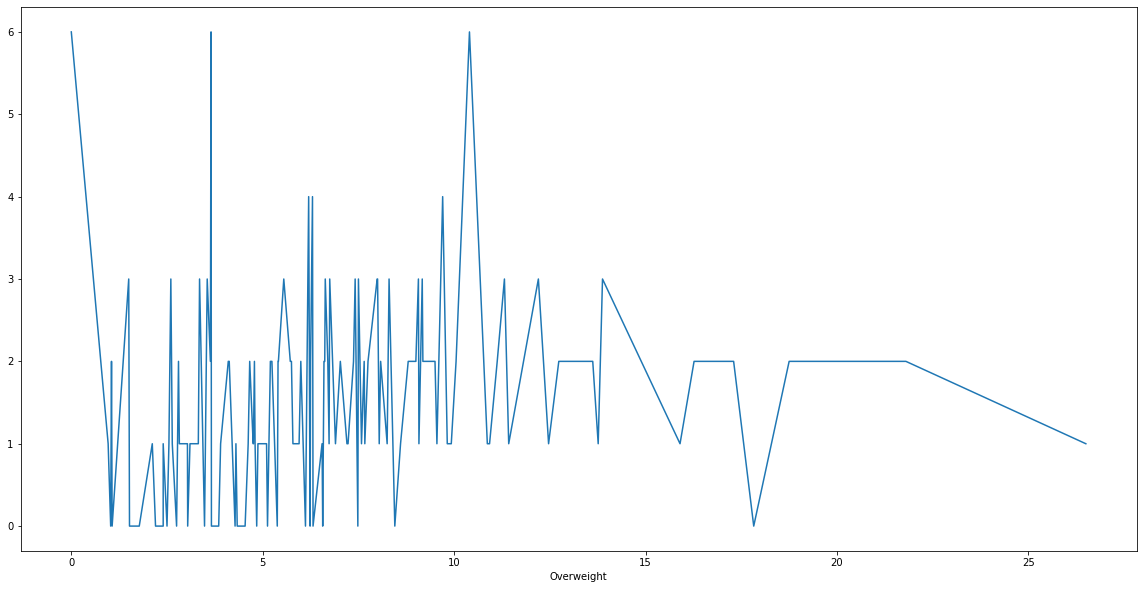

In [39]:
datae.groupby(['Overweight'])['Income Classification'].sum().plot(figsize = (20,10))

From this overweight persons getting low income compared to weight of persons whose weights are comparitively low in the overweight column

<AxesSubplot:xlabel='Overweight'>

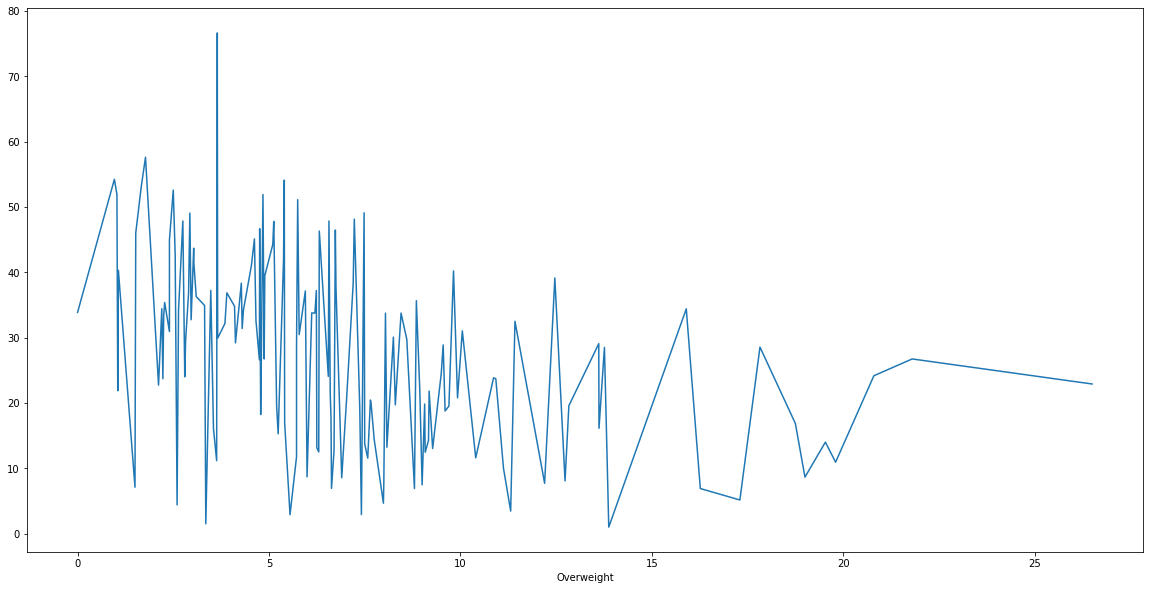

In [40]:
datae.groupby('Overweight')['Stunting'].sum().plot(figsize = (20,10))

<AxesSubplot:xlabel='Underweight'>

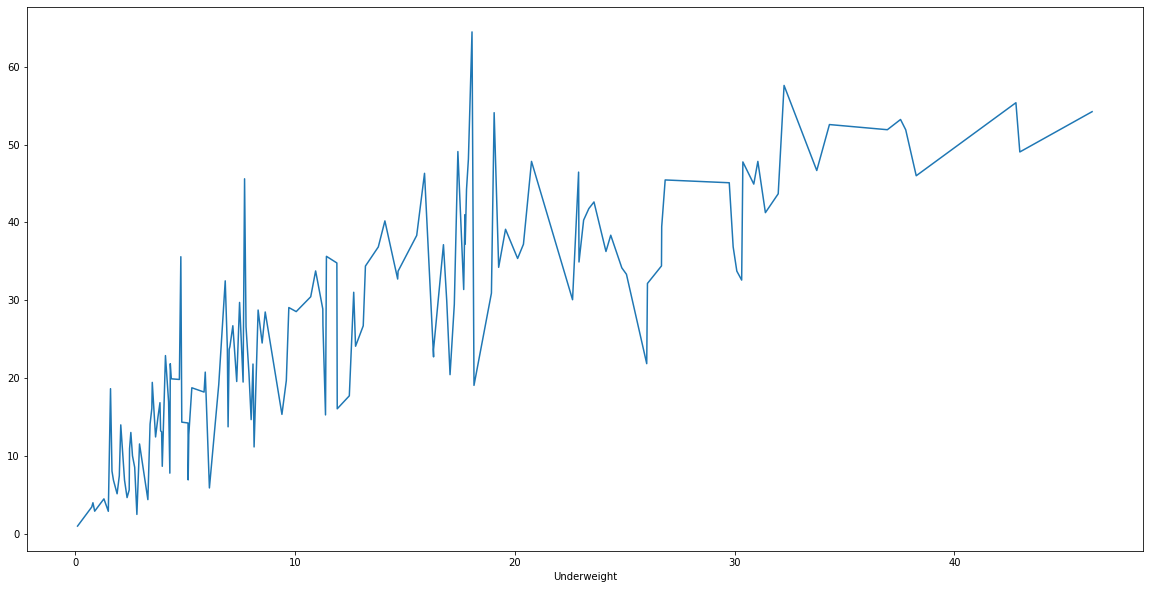

In [25]:
datae.groupby('Underweight')['Stunting'].sum().plot(figsize = (20,10))

Underweighted children is suffering more in stunting other than overwighted childern

<AxesSubplot:xlabel='Stunting'>

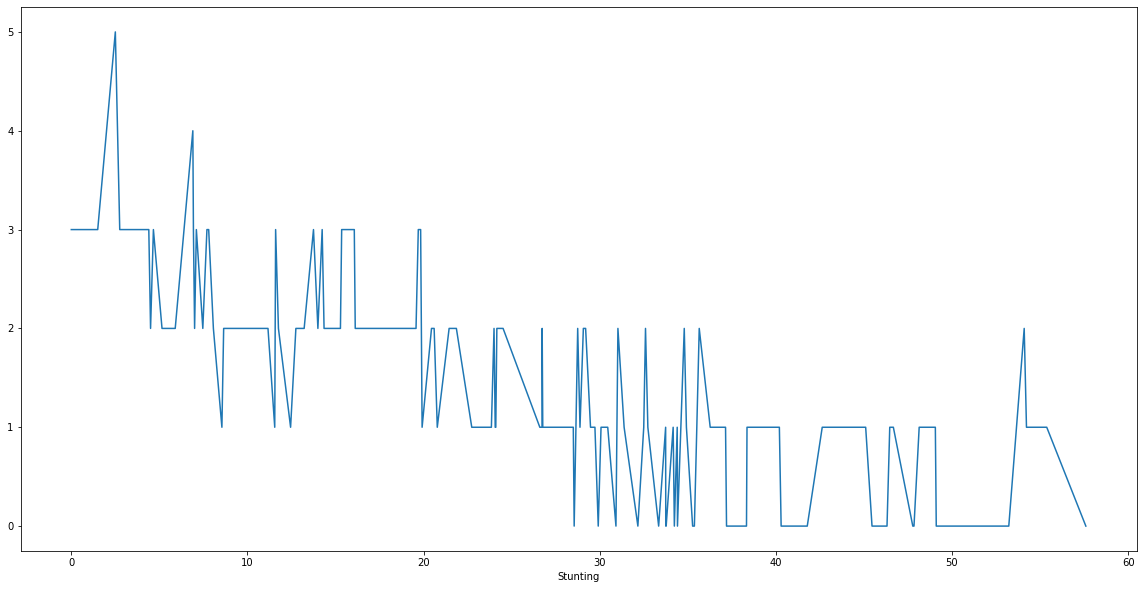

In [41]:
datae.groupby(['Stunting'])['Income Classification'].sum().plot(figsize = (20,10))

Stunting is inversly propotional to the income

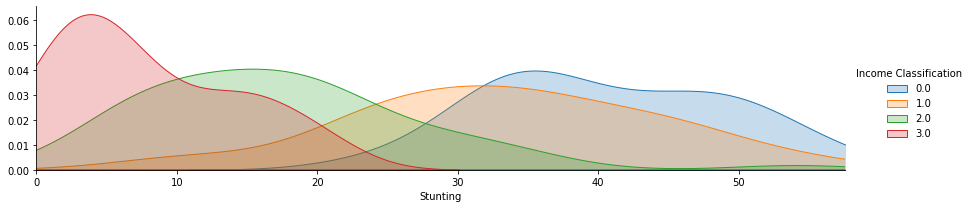

In [42]:
facet = sns.FacetGrid(datae, hue="Income Classification",aspect=4)
facet.map(sns.kdeplot,'Stunting',shade= True)
facet.set(xlim=(0, datae['Stunting'].max()))
facet.add_legend()
 
plt.show() 

Here also stunting is low for the high income classification

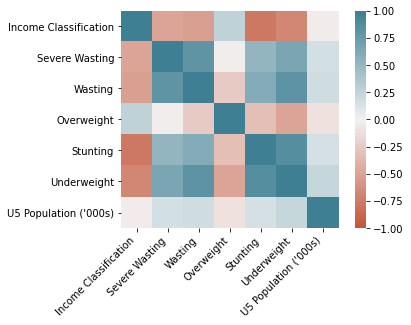

In [43]:
corr = datae.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Conclusion from heatmap

1) Severe wasting and wasting are highly correlated

2) Underweighting and stunting are highly correlated

3) Overweight is not at all correlated with any other features

# Malnutrition across different income groups

Undernutrition categories :
stunting, wasting, overweight, Underweight, and severe wasting

Income Classification:
Low income = 0, Lower middle income = 1, Upper middle income = 2, High income = 3,

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Income Classification', ylabel='average'>

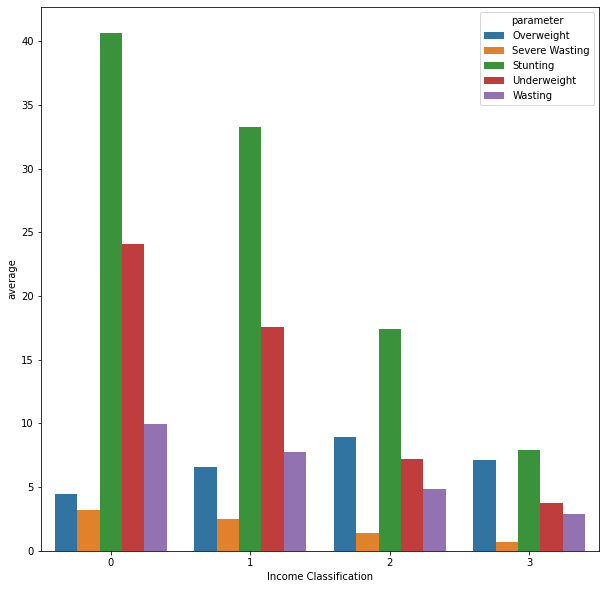

In [44]:
param_list =[ 'Overweight','Severe Wasting','Stunting', 'Underweight', 'Wasting']


data =pd.DataFrame(columns =['parameter','Income Classification','average'])

for param in param_list:
    for i in range(4):
        #value=df.loc[df['Income Classification']==i][param].mean()
        value = datae.loc[datae['Income Classification']==i][param].mean()
        value_dict = {'parameter':param,'Income Classification':i,'average':value}
        data = pd.concat([data, pd.DataFrame(data=[value_dict])])
        #data = pd.concat([data, pd.DataFrame.from_records([value_dict])])
        

plt.figure(figsize =(10,10))
sns.barplot(data =data, x='Income Classification', y='average', hue='parameter')
plt.show()

## Observations

1)As income incereses the malnutrition decreses to some amount

2)All income categories people are severly affected by strunting and underweight

3)As the income incerese the weight of people is also inceresed(overweight)..lol

4)Finally lower income is mostly affected by mal nutritions


# Malnutrition in LLDCs and SIDSs

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='LLDC or SID2', ylabel='average'>

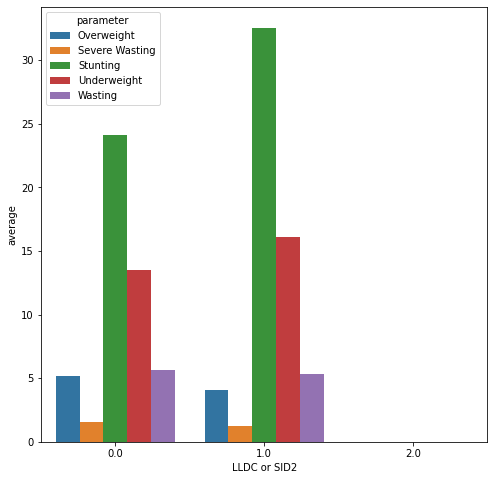

In [47]:
data_est = data_est.loc[data_est.Year >=2017]
data2 =pd.DataFrame(columns =['parameter','LLDC or SID2','average'])

for param in param_list:
    for i in [0.0,1.0,2.0]:
        #value=data_est.loc[data_est['Income Classification']==i][param].mean()
        value=data_est.loc[data_est['LLDC or SID2']==i][param].mean()
        value_dict = {'parameter':param,'LLDC or SID2':i,'average':value}
        
        data2 = pd.concat([data2, pd.DataFrame(data=[value_dict])])
        #data = pd.concat([data, pd.DataFrame.from_records([value_dict])])

#sns.factorplot(data =data, y='average', x='parameter', col='Income Classification', kind='bar')
plt.figure(figsize =(8,8))
sns.barplot(data =data2,  y='average', x='LLDC or SID2', hue='parameter')
plt.show()
        

## Observations

LLDC countries have high percent of Stunting and severe weight % and overweight % are very less in LLDC countries

# Countries which are very less affected from malnutrition

In [45]:
datae.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight']).head(10)

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
26,CANADA,3.0,0.0,0.000000,10.400000,0.000000,0.000000,1697.603000
6,AUSTRALIA,3.0,0.0,0.000000,13.875000,1.000000,0.100000,1443.074500
106,POLAND,3.0,0.0,0.000000,0.000000,2.750000,0.000000,1951.373000
29,CHILE,3.0,0.0,0.466667,11.313333,3.453333,0.746667,1303.080133
34,COSTA RICA,2.0,0.0,1.700000,8.800000,6.900000,2.237500,408.972125
36,CUBA,2.0,0.0,2.400000,0.000000,7.000000,3.400000,750.473000
107,QATAR,3.0,0.0,2.100000,10.400000,11.600000,4.800000,50.012000
8,BAHRAIN,3.0,0.0,6.700000,7.500000,13.750000,6.950000,63.371000
147,VENEZUELA (BOLIVARIAN REPUBLIC OF),2.0,0.0,4.333333,5.409524,16.957143,4.242857,2787.800095
80,MALAYSIA,2.0,0.0,11.600000,6.200000,19.075000,18.140000,2533.192900


# Most malnourished countries

In [46]:
datae.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight'], ascending =False).head(10)


,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
124,SOUTH SUDAN,0.0,11.400000,23.650000,8.450000,33.750000,30.100000,1459.262500
40,DJIBOUTI,1.0,9.400000,17.075000,8.250000,30.075000,22.625000,99.445250
61,INDIA,1.0,6.116667,18.766667,2.933333,49.055556,42.977778,123014.491000
28,CHAD,0.0,5.500000,15.240000,3.040000,41.260000,31.400000,2024.290400
32,COMOROS (THE),1.0,5.400000,10.125000,12.466667,39.125000,19.575000,90.287750
149,YEMEN,0.0,5.300000,15.242857,4.842857,51.900000,37.785714,3269.476000
129,SYRIAN ARAB REPUBLIC (THE),0.0,5.050000,9.566667,17.825000,28.550000,10.050000,2476.209333
132,TIMOR-LESTE,1.0,4.775000,15.620000,3.650000,55.380000,42.800000,160.444800
127,SUDAN (THE),1.0,4.766667,15.400000,2.900000,36.866667,29.933333,5551.013000
81,MALDIVES,2.0,4.725000,15.780000,4.660000,32.600000,30.320000,36.045400
